Import the libraries and data
handle the data(missing values) and split it (25% - 75%) --> train the model --> get results
split it and rerun for five times with cross validation with random seeds --> train the model --> get results

In [107]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from random import randrange
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('house-votes-84.data.txt', header = None)
df = shuffle(df, random_state = 42)
model = tree.DecisionTreeClassifier()

#check the dataset
#dataset

In [91]:
#converting the class to integers and handling missing values
for i in range(1,17):
    frequent  = df.iloc[:, i].mode()
    if(frequent[0] == 'y'):
        frequent = 1
    else:
        frequent = 0
    df.iloc[:, i] = df.iloc[:, i].map({"y": 1, "n":0, "?": frequent})
y = df.iloc[:, 0].map({"republican": 0, "democrat": 1})
X = df.iloc[:, 1:]

#trying train 25% & test 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

In [98]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
p = (predictions == y_test)
print(p.value_counts())
print("\nAccuracy: ",model.score(X_test, y_test))

True     306
False     21
Name: 0, dtype: int64

Accuracy:  0.9357798165137615


In [113]:
#trying different sizes to gain some insights on how it affects everything
sizes = []
nodes = []
accuracies = []
for i in range(1,6):
    j = i/10
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = j + .2, random_state = randrange(10))
    sizes.append((j+0.2)*100)
    model.fit(X_train, y_train)
    accuracies.append(model.score(X_test, y_test))
    nodes.append(model.tree_.node_count)

Text(0.5, 0, 'Accuracy')

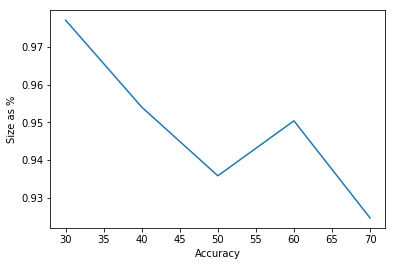

In [116]:
#plotting Sizes against Accuracy to show how the trainig data affects the accuracy
plt.plot(sizes, accuracies)
plt.ylabel('Size as %')
plt.xlabel('Accuracy')

Text(0.5, 0, '# of Nodes')

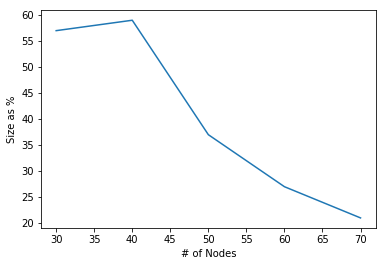

In [117]:
#plotting Sizes against Nodes to show how the trainig data affects the nodes
plt.plot(sizes, nodes)
plt.ylabel('Size as %')
plt.xlabel('# of Nodes')